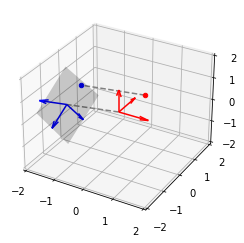

In [2]:
# PARALLEL PROJECTION TO A SURFACE IN 3D

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Spherical angle that defines projection direction
theta, phi = np.pi/3,-2*np.pi/3

# Axes in laboratory frame
R0 = np.array([[1 if (i>2)&(j==i-3) else 0 for j in range(3)] for i in range(6)])
ax.quiver(*R0,color='r')

# Axes and surface in projection frame
z = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi),  np.cos(theta)])
x = np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)])
y = np.cross(z,x)
R=2*z
surf = np.transpose(np.array([[R-x-y,R+x-y],[R-x+y,R+x+y]]),[2,0,1])
ax.plot_surface(surf[0],surf[1],surf[2],color='k',alpha=0.2,shade=False)
for i in [x,y,z]: ax.quiver(R[0],R[1],R[2],i[0],i[1],i[2],color='b')

# Point in laboratory frame
P0 = [0.5,0.7,0.5]
ax.scatter(*P0,color='r')

# Point's projection on the surface
P = P0+(2-np.dot(P0,z))*z
ax.scatter(*P,color='b')

# Projection lines
ax.plot([0,R[0]],[0,R[1]],[0,R[2]],color='gray',linestyle='--')
ax.plot([P0[0],P[0]],[P0[1],P[1]],[P0[2],P[2]],color='gray',linestyle='--')

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

plt.show()